**DATA EXPLORATION**

**Exploring data arrays with NumPy**

Suppose a college takes a sample of student grades for a data science class.

In [ ]:
# Loading the data into a list
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


Python lists are not optimized for numeric analysis. 
For that, we're going to use the NumPy package, which includes specific data types and functions for working with Numbers in Python.


In [ ]:
# Loading the data into a NumPy array
import numpy as np

grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


Checking the difference between a list and a NumPy array:

In [ ]:
print(type(data), 'X 2', data * 2)
print(type(grades), 'X 2', grades * 2)

<class 'list'> X 2 [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
<class 'numpy.ndarray'> X 2 [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


Multiplying a list by 2 creates a new list with the original sequence of list elements repeated twice.

Multiplying a NumPy array by 2 creates an array of the same size as the original list in which each element has been multiplied by 2.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data - which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the numpy array above is a numpy.ndarray. The nd indicates that this is a structure that can consists of multiple dimensions (it can have n dimensions). Our specific instance has a single dimension of student grades.

In [ ]:
grades.shape # this array has only one dimension, which contains 22 elements

(22,)

You can access the individual elements in the array by their zero-based ordinal position. Let's get the first element (the one in position 0).

In [ ]:
grades[0]

50

You can apply aggregations across the elements in the array, so let's find the mean/average grade value.

In [ ]:
grades.mean()

49.18181818181818

Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying.

In [ ]:
# define a list of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

In [ ]:
# Show shape of 2D array
student_data.shape # array contains 2 elements, each being an array with 22 elements

(2, 22)

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code:

In [ ]:
student_data[0][0]

10.0

You have a multidimensional array containing both the student's study time and grade information, which you can use to compare data.

For example, how does the mean study time compare to the mean grade?


In [ ]:
# get the mean value of each sub-array

avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f'Average study hours: {avg_study:.2f}\nAverage grade: {avg_grade:.2f}')

Average study hours: 10.52
Average grade: 49.18


**Exploring tabular data with Pandas**

While NumPy provides a lot of the functionality you need to work with numbers, and specifically arrays of numeric values; when you start to deal with two-dimensional tables of data, the Pandas package offers a more convenient structure to work with - the DataFrame.

In [ ]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'], #student names
                            'StudyHours':student_data[0], #study time
                            'Grade':student_data[1]}) #student grades

df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


(1) Finding and filtering data in a DataFrame

You can use the DataFrame's loc method to retrieve data for a specific index value:

In [ ]:
# get the data for index value 5
df_students.loc[5]

Name          Vicky
StudyHours        1
Grade             3
Name: 5, dtype: object

In [ ]:
# get the rows with index values from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In addition to being able to use the loc method to find rows based on the index, you can use the iloc method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [ ]:
# get the first 5 rows in the data frame:
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Comparing the iloc[0:5] results with the loc[0:5] results, we see that the **loc** method returned six rows (the rows with index label in the list of values from 0 to 5 i.e. 0, 1, 2, 3, 4, 5, 6)
while the **iloc** method returned five rows (the rows in the positions in the range 0 to 5, and since integer ranges don't include the upper-bound value, this
include the positions 0, 1, 2, 3, 4).

The **iloc** method identifies values in a DataFrame by position, which extends beyond rows to columns.

In [ ]:
df_students.iloc[0,[1,2]] # row 0, columns 1 and 2

StudyHours    10
Grade         50
Name: 0, dtype: object

To select columns using the **loc** method, we need to specify their names:

In [ ]:
df_students.loc[0,'Grade']

50.0

In [ ]:
df_students.loc[0, ['StudyHours','Grade']]

StudyHours    10
Grade         50
Name: 0, dtype: object

In [ ]:
# loc: identifies values based on index
# iloc: identifies values based on positions

You can use the loc method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [ ]:
df_students.loc[df_students['Name'] == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


You don't need to explicitly use the loc method to do this - you can simply apply a DataFrame filtering expression:

In [ ]:
df_students[df_students['Name'] == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


You can achieve the same results by using the DataFrame's query method:

In [ ]:
df_students.query('Name == "Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


You can specify the column name as a named index value
(e.g. df_students['Name']) or you can use the column as a property of the DataFrame:

In [ ]:
df_students[df_students.Name == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


(2) Loading a DataFrame from a file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving grades.csv to grades.csv


In [ ]:
import io
df_students = pd.read_csv('https://raw.githubusercontent.com/claudiur-deloitte/ml-basics/master/data/grades.csv') # loading data from text files

In [ ]:
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


(3) Handling missing values

How can we find out that a DataFrame contains missing values?

In [ ]:
df_students.isnull() 

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


With a larger DataFrame, it would be inefficient to reviews all of the rows and columns individually.

Instead, we can get the sum of missing values for each column:

In [ ]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

To see the rows with missing values, we can filter the DataFrame to include only rows where any of the columns have null values:

In [ ]:
df_students[df_students.isnull().any(axis=1)] 
#rows are axis 0 and columns are axis 1
# NaN stands for 'not a number'

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


What can we do about missing values?

In [ ]:
# Impute replacement values using the fillna method

df_students['StudyHours'] = df_students['StudyHours'].fillna(df_students['StudyHours'].mean())
# assume the student studies for an average amount of time
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


In [ ]:
# Drop rows/columns that contain missing values using the dropna method
# (to ensure that you only use data you know to be absolutely correct)

df_students = df_students.dropna(axis = 0, how = 'any') # drop rows with any missing values
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


(4) Explore data in a DataFrame

In [ ]:
# Get the mean study hours using the column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print(f'Average weekly study hours: {mean_study:.2f}\nAverage grade: {mean_grade:.2f}')

Average weekly study hours: 10.52
Average grade: 49.18


In [ ]:
# Find the students who studied more than the average amount of time
df_students[df_students['StudyHours'] > mean_study] # filtered result is itself a DataFrame

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [ ]:
# Find the average grade for students who undertook more than the average amount of study time
df_students[df_students['StudyHours'] > mean_study]['Grade'].mean()

66.7

Assume that the passing grade for the course is 60. 
Use this information to add a new column to the DataFrame, indicating whether or not each student has passed.

In [ ]:
df_students.loc[df_students['Grade'] >= 60, ['Pass']] = True
df_students.loc[~(df_students['Grade'] >= 60), ['Pass']] = False
df_students

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


DataFrames are designed for tabular data, and you can use them to perform many of the kinds of data analytics operation you can do in a relational database; such as grouping and aggregating tables of data:

In [ ]:
# Use the groupby method 
# to group the data based on the 'Pass' column
# and count the number of names in each group
# i.e. determine how many students passed and failed

print(df_students.groupby(['Pass'])['Name'].count())

Pass
False    15
True      7
Name: Name, dtype: int64


You can aggregate multiple fields in a group using any available aggregation function.

In [ ]:
# Find the mean study time and mean grade for the groups of students who passed/failed the course
print(df_students.groupby(['Pass'])[['StudyHours','Grade']].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


Many DataFrame operations return a new copy of the DataFrame; so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable.

In [ ]:
# Sort the data into descending order of 'Grade' 

df_students = df_students.sort_values('Grade', ascending = False)
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


**Visualizing data with Matplotlib**

The Matplotlib library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

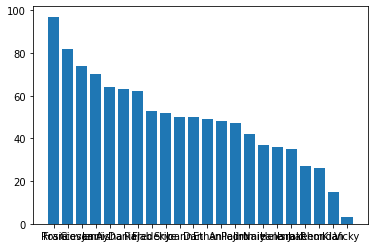

In [ ]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x = df_students['Name'], height = df_students['Grade'])

# Display the plot
plt.show()

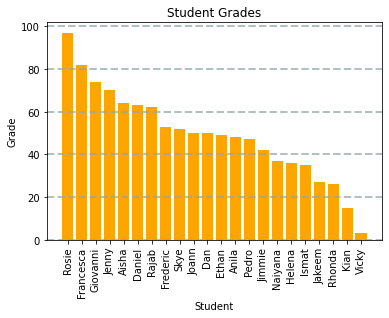

In [ ]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange') # specify the color of the bar chart

# Customize the chart
plt.title('Student Grades') # specify the title
plt.xlabel('Student') # add a label to the x-axis
plt.ylabel('Grade') # add a label to the y-axis
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7) # add a grid
plt.xticks(rotation=90) # rotate the x-markers by 90 degrees so that we can read them

# Display the plot
plt.show()

A plot is technically contained with a Figure. In the previous examples, the figure was created implicitly for you; but you can create it explicitly. For example, the following code creates a figure with a specific size.

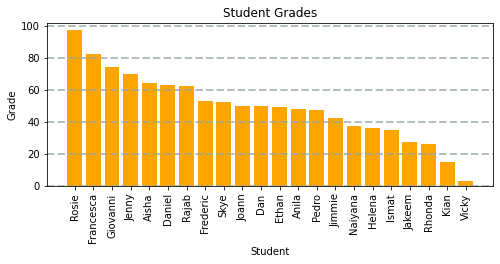

In [ ]:
# Create a Figure
fig = plt.figure(figsize=(8,3)) #(width, height)

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own axis.

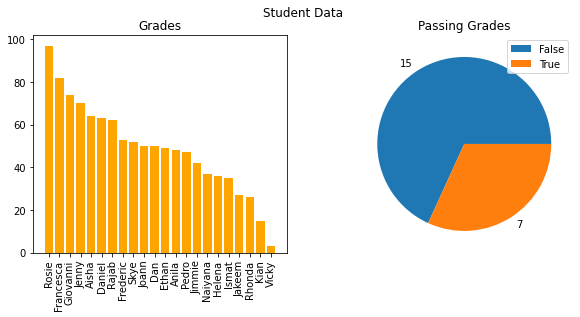

In [ ]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot showing student grades on the first axis
ax[0].bar(x = df_students['Name'], height = df_students['Grade'], color = 'orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students['Name'], rotation=90)

# Create a pie chart comparing the number of passing grades to non-passing grades on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Until now, we've been using methods of the Matplotlib.pyplot object to plot charts. 

However, many Python packages (including Pandas), provide methods that abstract the underlying Matplotlib functions and simplify plotting. 

For example, the DataFrame provides its own methods for plotting data:

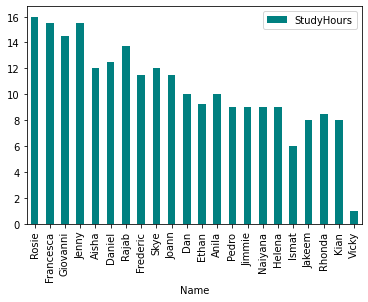

In [ ]:
df_students.plot.bar(x = 'Name', y = 'StudyHours', color = 'teal', figsize=(6,4))

**Getting started with statistical analysis**

(1) Data distribution: how are all the different values spread across the sample

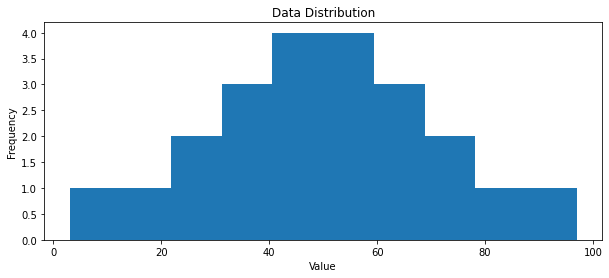

In [ ]:

# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show() 

The histogram has a symmetric shape, with the most frequent grades occuring in the middle (around 50) and with fewer grades at the extreme ends of the scale.

(2) Measures of central tendency: mean, median, mode

Measures of central tendency are statistics that represent the 'middle' of the data. Common ways to define the middle of the data include:

(i) the mean: the sum of al lthe values in the sample set, divided by the
              the total number of samples;

(ii) the median: the values in the middle of the range of all the sample values;

(iii) the mode: the most commonly occuring value in the sample set (there can be
                a tie for the most common value - in which case the dataset is
                described as bimodal or even multimodal)
                

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



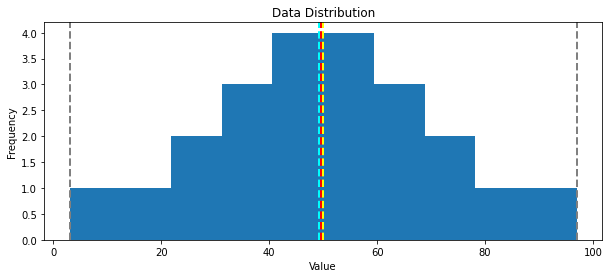

In [ ]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x = min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x = mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x = med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x = mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x = max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

Above, the mean, median and mode all seem to be more or less in the middle between the minimum and maximum (around 50).

Another way to visualize the distribution of a variable is to use a box plot (sometimes called a box-and-whiskers plot):

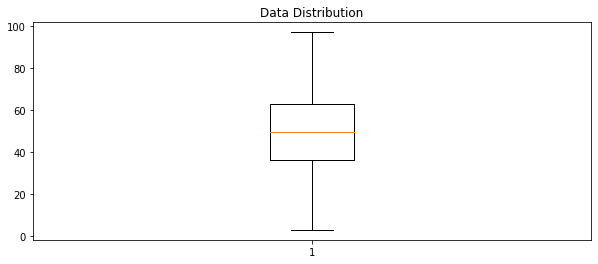

In [ ]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The lower whisker represents the lowest observation.

The upper whisker represents the highest observation.

The lower border of the box represents the first quartile (Q1).

The upper border of the box represents the third quertile (Q3).

The line in the box represents the median (Q2).


(3) Measures of variance: how much variability there is in the data

Typical statistics that measure variability in the data include:

(i) range: the difference between the maximum and minimum;

(ii) variance: the average of the squared difference from the mean;

(iii) standard deviation: the square root of the variance;

In [ ]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful.
It provides a measure of variance in the data on the same scale as the data itself (i.e. grade points for the Grade distribution and hours for StudyHours).
The higher the standard deviation, the more spread out the data is.

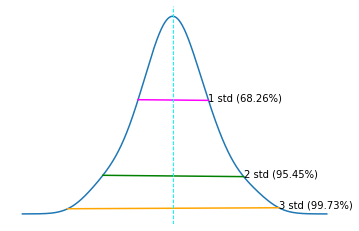

In [ ]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

In any normal distribution:

Approximately 68.26% of values fall within one standard deviation from the mean.

Approximately 95.45% of values fall within two standard deviations from the mean.

Approximately 99.73% of values fall within three standard deviations from the mean.

**Comparing data**

First, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students:

In [ ]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


The data includes two numeric variables (StudyHours and Grade) and two categorical variables (Name and Pass).

(1) Comparing numeric and categorical variables

Compare the numeric StudyHours column to the categorical Pass column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


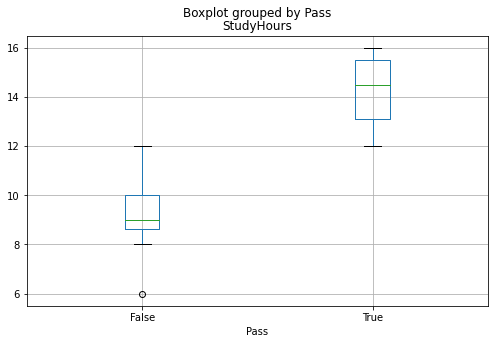

In [ ]:
df_sample.boxplot(column = 'StudyHours', by = 'Pass', figsize = (8,5))

Students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive feature.

(2) Comparing numeric variables

Compare two numeric variables: start by creating a bar chart that shows both grade and study hours.

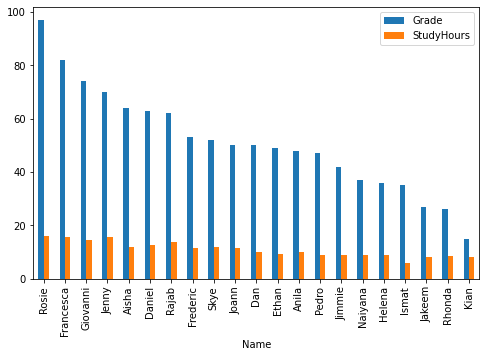

In [ ]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.

A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution, but are measured on the same scale. 

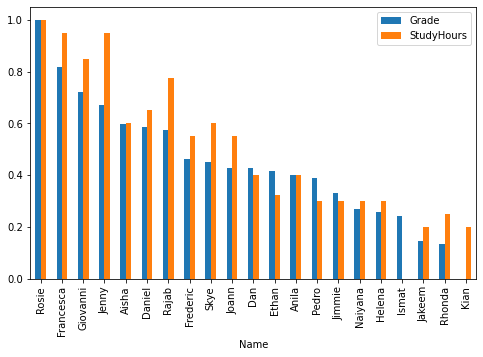

In [ ]:
from sklearn.preprocessing import MinMaxScaler # distributes the values proportionally on a scale of 0 to 1

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It seems like students with higher grades tend to have studied more.

There seems to be a correlation between study time and grade:

In [ ]:
df_normalized['Grade'].corr(df_normalized['StudyHours'])

0.9117666413789675

In this case, the correlation value is close to 1; showing a strongly positive correlation between study time and grade.

Another way to visualise the apparent correlation between two numeric columns is to use a scatter plot.

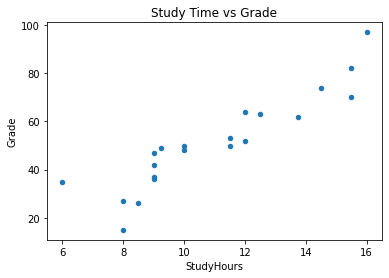

In [ ]:
#Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

**REGRESSION**

**Introduction**

Supervised machine learning involves training a model to operate on a set of *features* (x1, x2, ..., xn) and predict a *label * (y) using a dataset that includes some already-known label values. 

The training process *fits* the features to the known labels to define a general function (f(x)) that can be applied to new features for which the labels are unknown and predict them:

y = f(x) if there is only one feature or
y = f([x1,x2, ..., xn]) if there are multiple features.

Supervised machine learning algorithms can be broadly divided into two categories:


*   Regression algorithms: the predicted value y takes on continuous values (an infinite set of values); e.g. predicting a person's salary given their years of experience.
*   Classification algorithms: the predicted value y takes on discrete values (a finite set of values); e.g.  predicting whether a tumor is malignant of benign based on tumor size.



In this notebook, we'll focus on regression, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. We'll use a simplified version of the dataset from that study.




**(1) Explore the Data**

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict.

In [46]:

import io
import pandas as pd

# Load the training dataset
bike_data = pd.read_csv('https://raw.githubusercontent.com/claudiur-deloitte/ml-basics/master/data/daily-bike-share.csv') # loading data from text files
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:


*   instant: A unique row identifier
*   dteday: The date on which the data was observed
*   season: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
*   yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
*   mnth: The calendar month in which the observation was made (1:January ... 12:December)
*   holiday: A binary value indicating whether or not the observation was made on a public holiday)
*   weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
*   workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
*   weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
*   temp: The temperature in celsius (normalized)
*   atemp: The apparent ("feels-like") temperature in celsius (normalized)
*   hum: The humidity level (normalized)
*   windspeed: The windspeed (normalized)
*   rentals: The number of bicycle rentals recorded.

In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

In [47]:
# Derive a new feature (day) from the dteday column (feature engineering)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [48]:
# Examining descriptive statistics for the numeric features and the rentals column
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


The statistics reveal some information about the distribution of the data in each of the numeric fields:


*   the number of observations is 731
*   the mean, standard deviation, minimum and maximum values and the quartile values (thresholds are 25%, 50% -- the median-- and 75%)
*   the mean number of daily rentals is around 848
*   the standard deviation for the daily rentals (686) is comparatively large, which indicates a lot of variance in the number of rentals per day

We might get a clearer idea of the distribution of rentals values by visualizing the data. We will create a histogram and a box plot for the **rentals** column, these being common plot types for visualizing the distribution of numeric data.





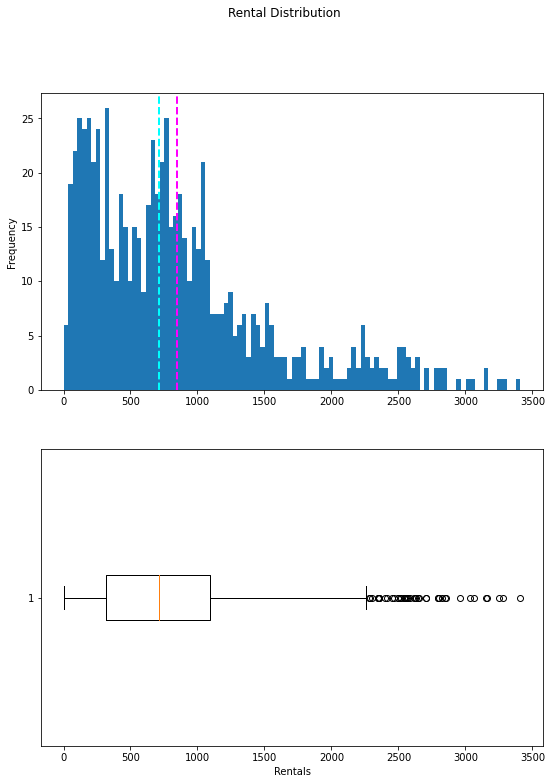

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100) # defines the number of equal-width bins in the range
ax[0].set_ylabel('Frequency')

# Add lines for the mean and median
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False) #If True (default), makes the boxes vertical. If False, everything is drawn horizontally.
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()






*   the plots show that the number of daily rentals ranges from 0 to just over 3,400
*   the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals
*   the few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data


We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.









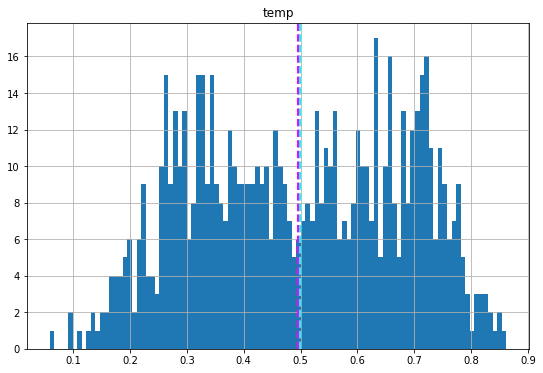

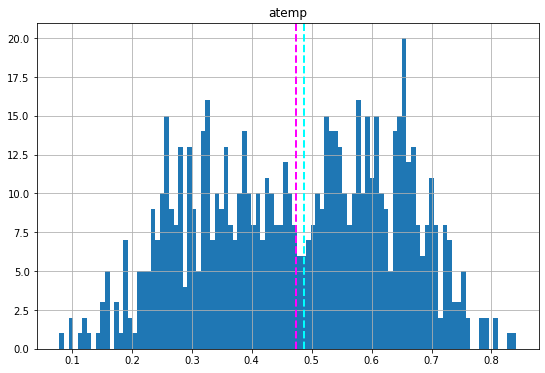

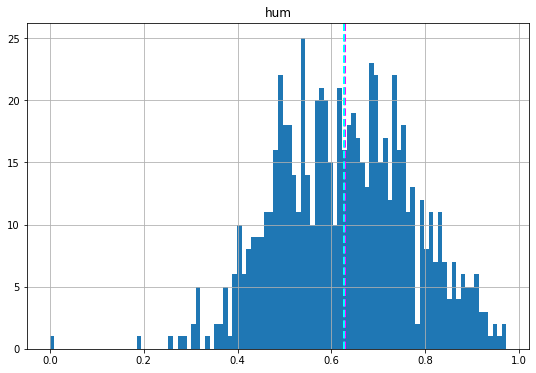

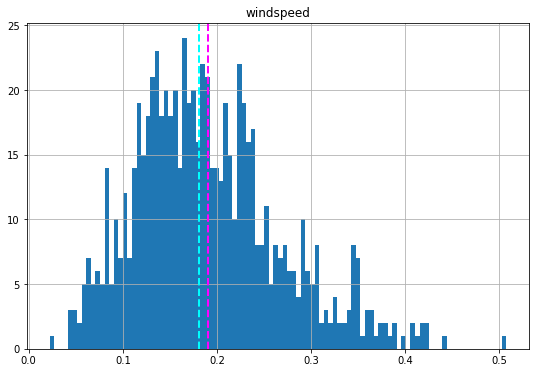

In [50]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get the current axes, creating one if necessary
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

The distributions are not truly normal in the statistical sense, which would result in a smooth, symmetric "bell-curve" histogram with the mean and mode (the most common value) in the center; but they do generally indicate that most of the observations have a value somewhere near the middle.

We next explore the distribution of the categorical features using bar charts:

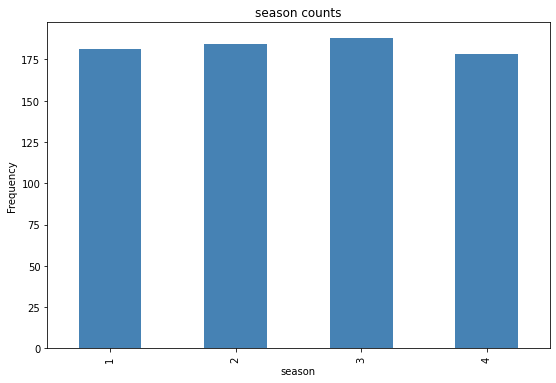

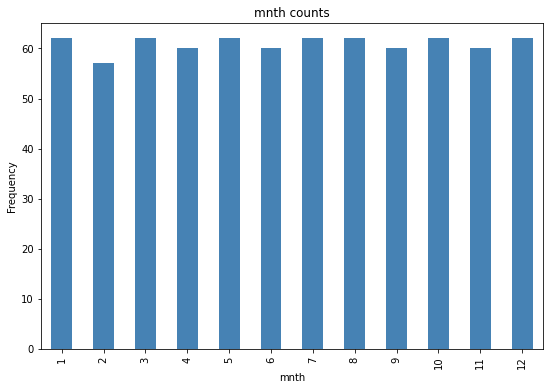

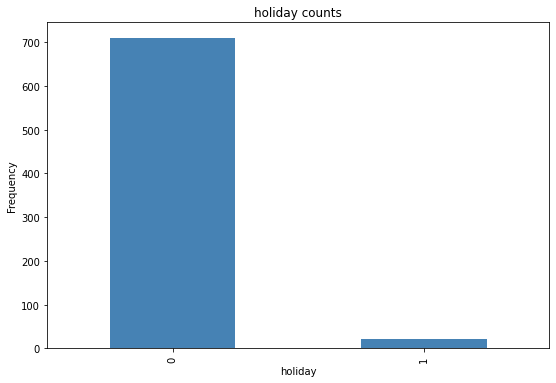

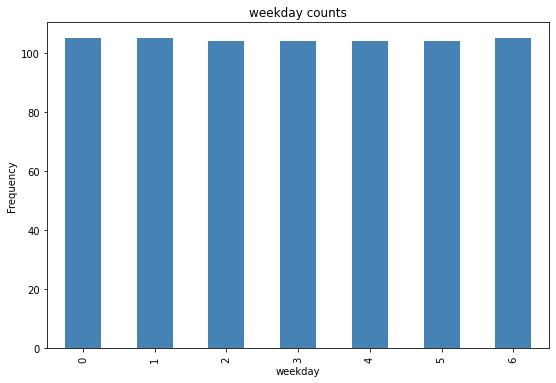

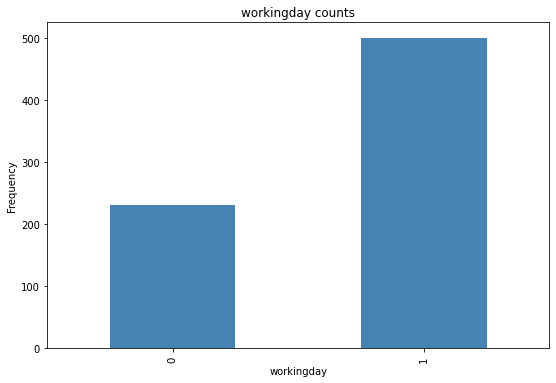

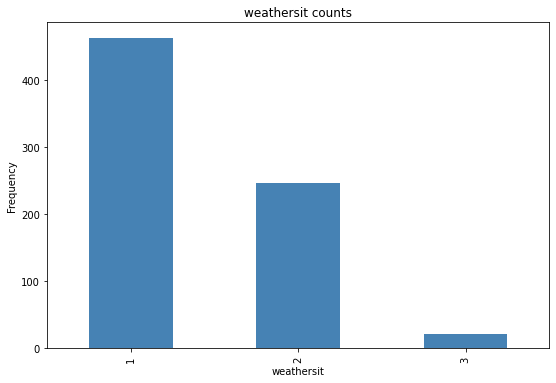

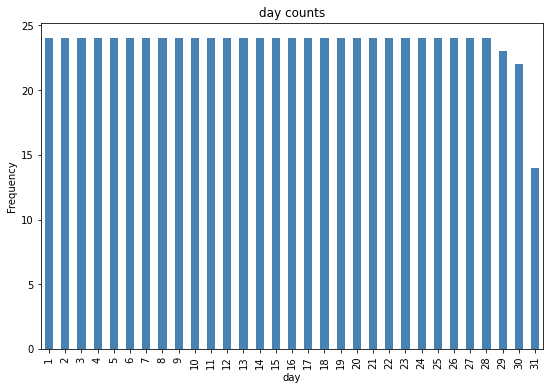

In [51]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less uniform distribution (roughly the same number of rows for each category), except:


*   holiday: there are more days that are not holidays than days that are not holidays
*   workingday: there are more days that are workingdays than days that are not workingdays
*   weathersit: most days are category 1 (clear), with category 2 (mist and cloud) the next most common; there are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.

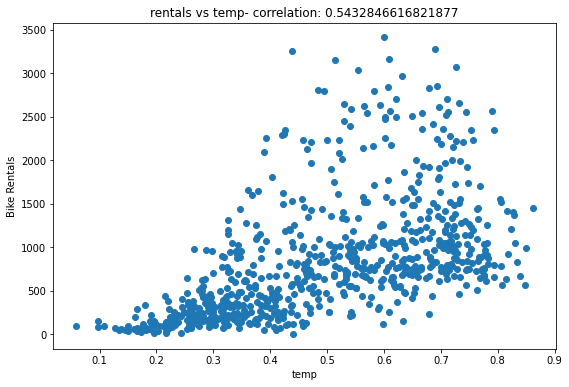

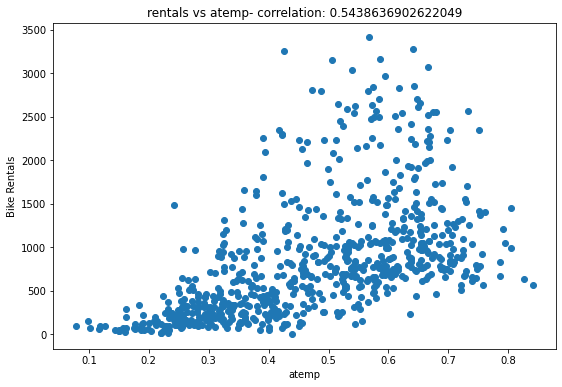

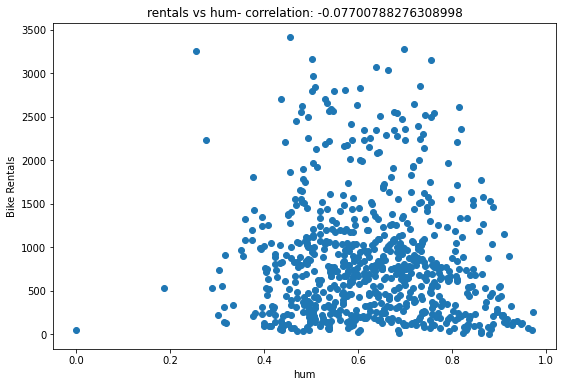

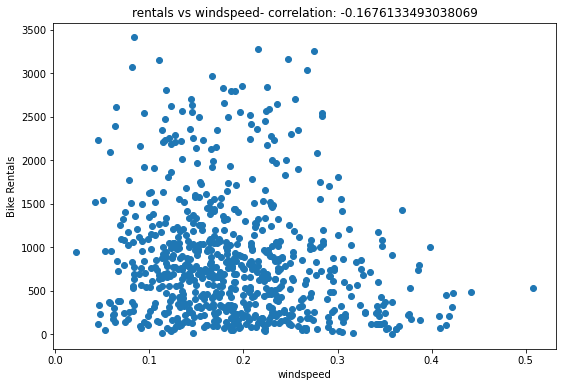

In [52]:
# Numeric Features: scatter plots and correlation statistic
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label) # Pearson correlation coefficient between feature and label
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

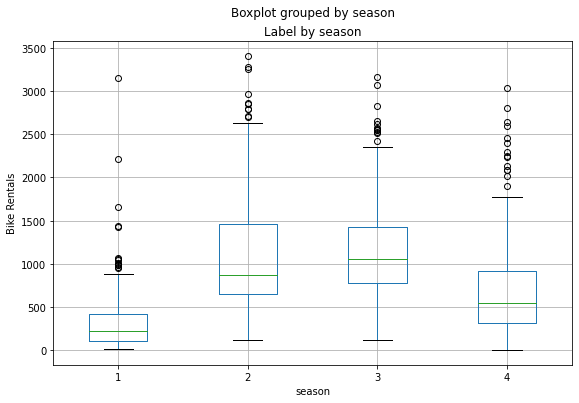

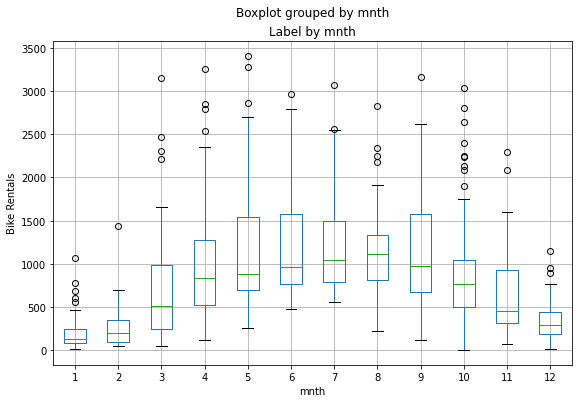

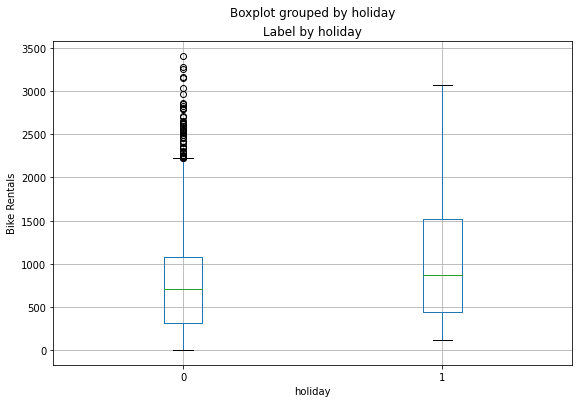

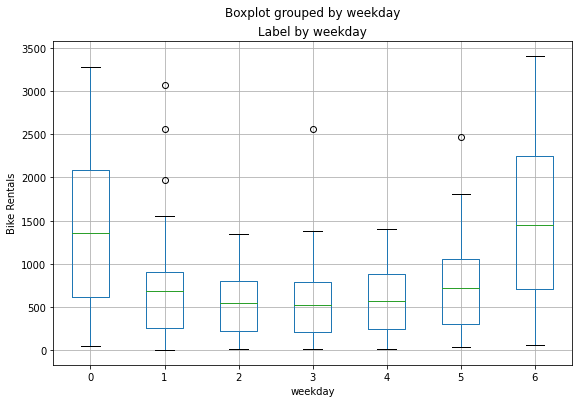

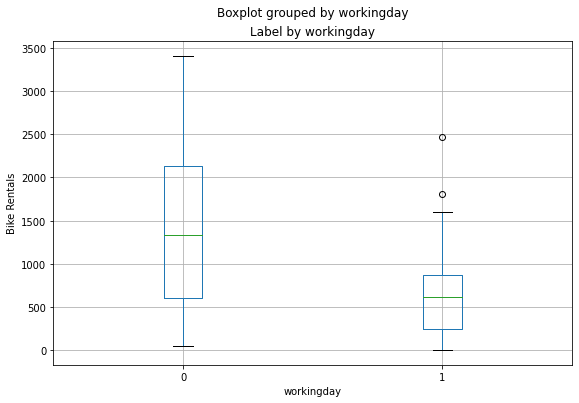

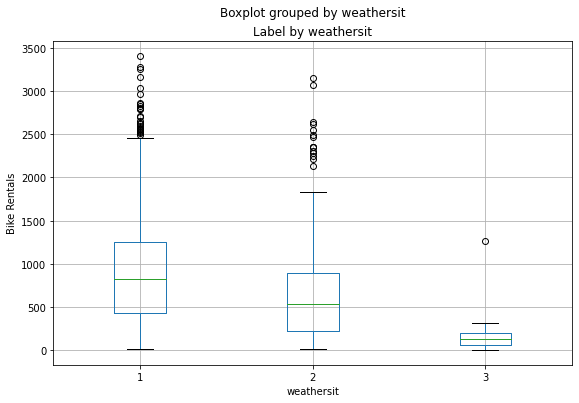

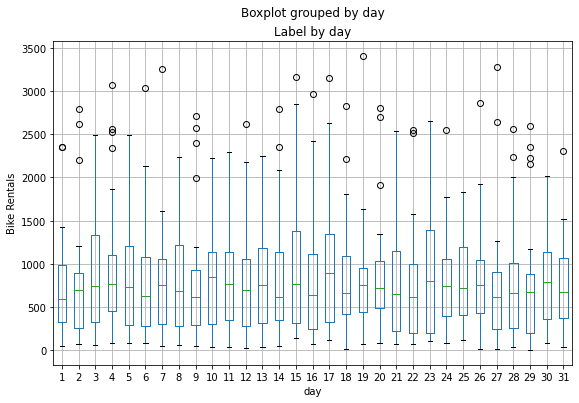

In [53]:
# Categorical features: box plots


# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()


The plots show some variance in the relationship between some category values and rentals:


*   weekday: there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5)
*   holiday and working day: there are notable differences between the two categories
*   season: there are different rental distributions in summer and fall vs. spring and winter.
*   weathersit: there's a difference in rental distribution across the weather situations
*   day: there's little variation in the rental distribution acrros the days of the month, which suggests that this feature is probably not predictive of the number of rentals.






**(2) Train a Regression Model**

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the rentals label.


In [54]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit',
                  'temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.

It's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. It's important to split the data randomly (rather than say, taking the first 70% of the data for training and keeping the rest for validation). This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distribution to the data on which it was trained).

To randomly split the data, we'll use the train_test_split function in the scikit-learn library. 

In [55]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))
# The %d operator is used as a placeholder to specify integer values, decimals or numbers. 

Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:


*   X_train: the feature values used to train the model
*   y_train: the corresponding labels used to train the model
*   X_test: the feature values used to validate the model
*   y_test: the corresponding labels used to validate the model

We'll start by using a linear regression algorithm. This algorithm tries to find a linear relationship between the X values and the y label.
The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In [56]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**(3) Evaluate the Trained Model**

Now that we've trained the model, we can use it to predict rental counts for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

In [57]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True) # print floating point numbers using fixed point notation
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding actual value isn't a very efficient way to determine how well the model is predicting.

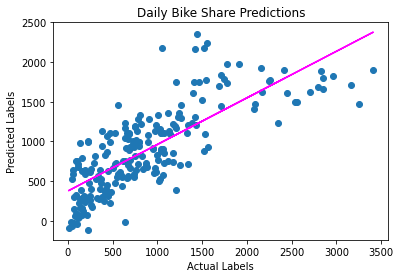

In [58]:
# Scatter plot that compares the predictions to the actual labels


import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression/trend line
z = np.polyfit(y_test, predictions, 1) # Least squares polynomial fit
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. 

This variance represents the residuals of the model.

These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:



(1)   Mean Squared Error (MSE):
- the mean of the squared differences between predicted and actual values
- yields a relative metric in which the smaller the value, the better the fit of the model

(2)   Root Mean Squared Error (RMSE):
- the square root of the MSE
- yields an absolute metric in the same unit as the label (in this case, numbers of rentals); the smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)

(3)  Coefficient of Determination (R-squared):
- represents how much of the variance between predicted and actual label values the model is able to explain
- a relative metric in which the higher the value, the better the fit of the model



In [59]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


So now we've quantified the ability of our model to predict the number of rentals. It definitely has some predictive power, but we can probably do better!

**(3) Experiment with Algorithms**

The linear regression algorithm we used to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:


* Linear algorithms: Not just the Linear Regression algorithm we used above (which is technically an Ordinary Least Squares algorithm), but other variants such as Lasso and Ridge.
* Tree-based algorithms: Algorithms that build a decision tree to reach a prediction.
*   Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

**Try another linear algorithm**

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


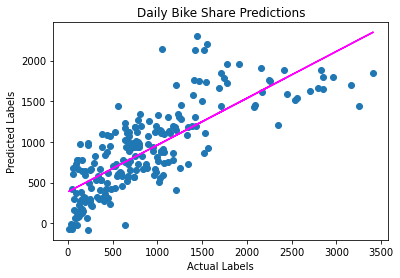

In [60]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Try a decision tree algorithm**

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text # builds a text report showing the rules of a decision tree.

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_

MSE: 271142.4954545455
RMSE: 520.7134485055533
R2: 0.46844215555206115


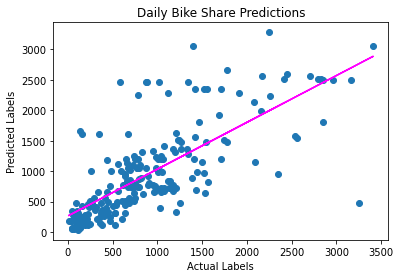

In [62]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The tree-based model doesn't seem to have improved over the linear model, so what else could we try?

**Try an ensemble algorithm**

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

MSE: 116028.79216454548
RMSE: 340.6299930489761
R2: 0.7725328353510594


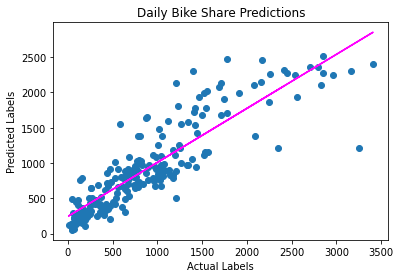

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 103946.79433451979
RMSE: 322.4078074962202
R2: 0.7962188337866303


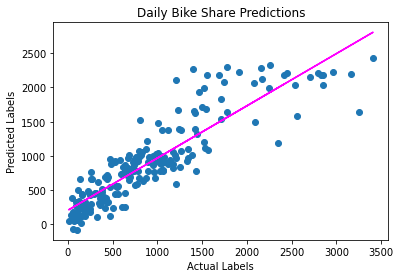

In [64]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**(4) Optimize Hyperparameters**

Take a look at the GradientBoostingRegressor estimator definition in the output above, and note that it, like the other estimators we tried previously, includes a large number of parameters that control the way the model is trained. In machine learning, the term parameters refers to values that can be determined from data; values that you specify to affect the behavior of a training algorithm are more correctly referred to as hyperparameters.

Hyperparameters vary based on the algorithm that the estimator encapsulates.

In many cases, the default values provided by Scikit-Learn will work well; but there may be some advantage in modifying hyperparameters to get better predictive performance or reduce training time.

SciKit-Learn provides a way to tune hyperparameters by trying multiple combinations and finding the best result for a given performance metric.

Let's try using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 104120.5578393804
RMSE: 322.67717278943115
R2: 0.7958781813413816


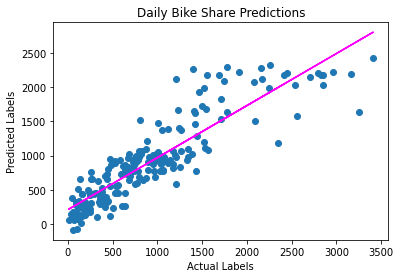

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Note: The use of random values in the Gradient Boosting algorithm results in slightly different metrics each time. In this case, the best model produced by hyperparameter tuning is unlikely to be significantly better than one trained with the default hyperparameter values; but it's still useful to know about the hyperparameter tuning technique!

**(5) Pre-process the data**

We trained a model with data that was loaded straight from a source file, with only moderately successful results.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

Scaling numeric features
Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. For example, suppose your data includes the following numeric features:

A	B	C
3	480	65
Normalizing these features to the same scale may result in the following values (assuming A contains values from 0 to 10, B contains values from 0 to 1000, and C contains values from 0 to 100):

A	B	C
0.3	0.48	0.65
There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same spread of values on a different scale.

Encoding categorical variables
Machine learning models work best with numeric features rather than text values, so you generally need to convert categorical features into numeric representations. For example, suppose your data includes the following categorical feature.

Size

S

M

L

You can apply ordinal encoding to substitute a unique integer value for each category, like this:

Size

0

1

2

Another common technique is to use one hot encoding to create individual binary (0 or 1) features for each possible category value. For example, you could use one-hot encoding to translate the possible categories into binary columns like this:

Size_S	 Size_M	  Size_L

1	         0	     0

0	         1	     0

0	         0	     1

To apply these preprocessing transformations to the bike rental, we'll make use of a Scikit-Learn feature named pipelines. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

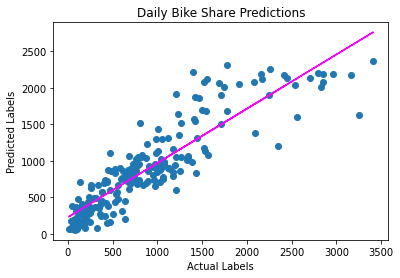

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

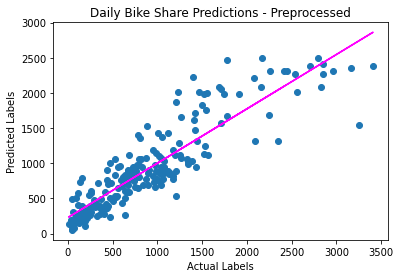

In [66]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [79]:
import joblib

# Save the model as a pickle file
filename = 'bike-share.pkl'
joblib.dump(model, filename)

['bike-share.pkl']

In [81]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 20kB/s 
     |████████████████████████████████| 8.8MB 45.5MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [84]:
import torch
path = F"/content/drive/My Drive/{filename}" 
torch.save(model, path)

In [85]:
!ls /content/drive/MyDrive

 20191111173114237.gdoc  'Colab Notebooks'	 RTutorial-Level0.gdoc
 20191111173114237.pdf	 'Getting started.pdf'
 bike-share.pkl		 'M6 .ipynb'


In [71]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 104 rentals


In [72]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
608.0
739.0
228.0
190.0
277.0
